# Programming Foundation Final Assignment

In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

import matplotlib.pyplot as plt

In [18]:
#导入数据，观察训练集和测试集
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 探索数据性质

In [19]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 缺失值分析

In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%
Percent of missing "Cabin" records is 77.10%
Percent of missing "Embarked" records is 0.22%


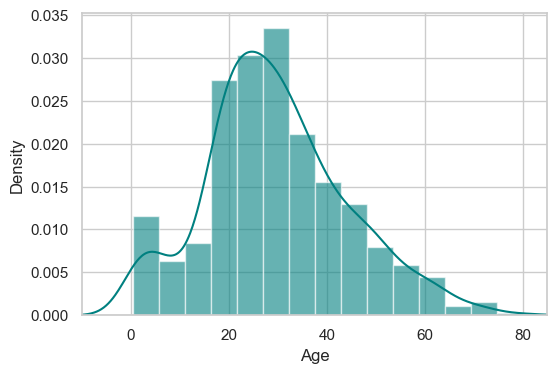

In [24]:
#年龄分布
plt.figure(dpi=100)
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

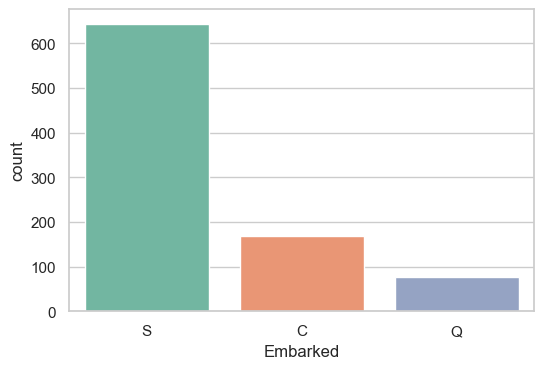

In [25]:
#登船港口分布
plt.figure(dpi=100)
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

### 整体相关性分析

In [26]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


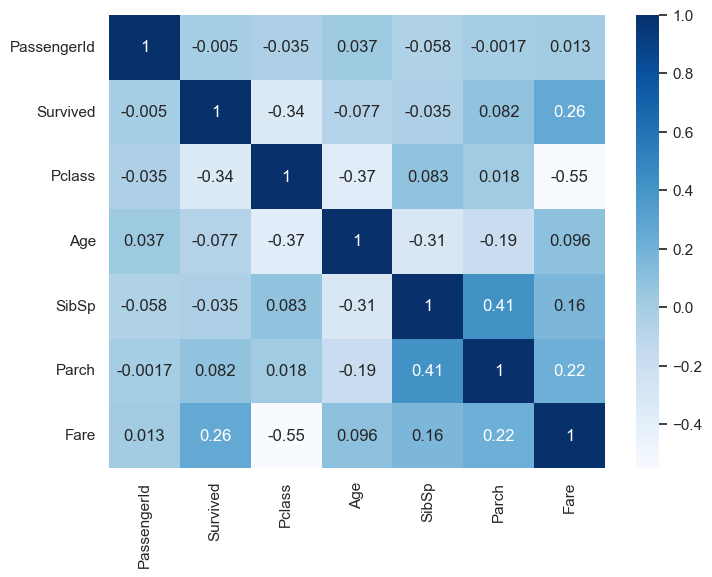

In [27]:
plt.figure(dpi=100,figsize=(8,6))
sns.heatmap(train_df.corr(),annot=True,cmap='Blues')
plt.show()

### 数据间相关性分析

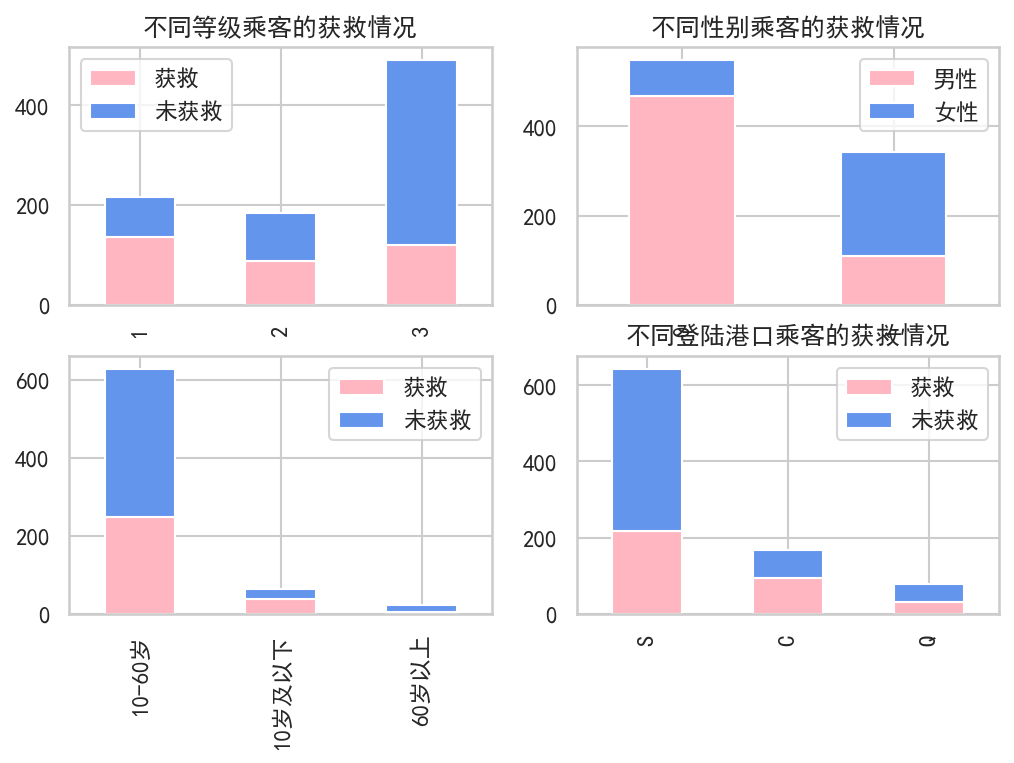

In [33]:
plt.figure(figsize=(8,5),dpi=150)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False #不使用中文减号

#乘客等级和获救情况的关系
p1 = plt.subplot(221)
Pclass_0 = train_df.loc[train_df['Survived']==0,'Pclass'].value_counts()
Pclass_1 = train_df.loc[train_df['Survived']==1,'Pclass'].value_counts()
df_pclass = pd.DataFrame({u'获救':Pclass_1,u'未获救':Pclass_0})
df_pclass.plot(kind='bar',stacked=True,color =['lightpink','cornflowerblue'], ax=p1)
plt.title(u'不同等级乘客的获救情况')

p2 = plt.subplot(222)
Survived_m = train_df.loc[train_df['Sex'] == 'male', 'Survived'].value_counts()
Survived_f = train_df.loc[train_df['Sex'] == 'female', 'Survived'].value_counts()
df_sex = pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df_sex.plot(kind='bar', stacked=True,color =['lightpink','cornflowerblue'], ax=p2)
plt.title(u'不同性别乘客的获救情况')

p3 = plt.subplot(223)
bins = [min(train_df['Age']),10,60,max(train_df['Age'])]
bins_label = ['10岁及以下', '10-60岁', '60岁以上']
train_df['Age_cut'] = pd.cut(train_df['Age'],bins=bins,labels=bins_label)
Age_0 = train_df.loc[train_df['Survived'] == 0, 'Age_cut'].value_counts()
Age_1 = train_df.loc[train_df['Survived'] == 1, 'Age_cut'].value_counts()
df_age = pd.DataFrame({u'获救':Age_1,u'未获救':Age_0})
df_age.plot(kind='bar', stacked=True, color =['lightpink','cornflowerblue'], ax=p3)

p4 = plt.subplot(224)
Embarked_0 = train_df.Embarked[train_df.Survived == 0].value_counts()
Embarked_1 = train_df.Embarked[train_df.Survived == 1].value_counts()
df_Embarked = pd.DataFrame({u'获救': Embarked_1, u'未获救': Embarked_0})
df_Embarked.plot(kind='bar', stacked=True,  color =['lightpink','cornflowerblue'], ax=p4)
plt.title(u'不同登陆港口乘客的获救情况')

plt.show()

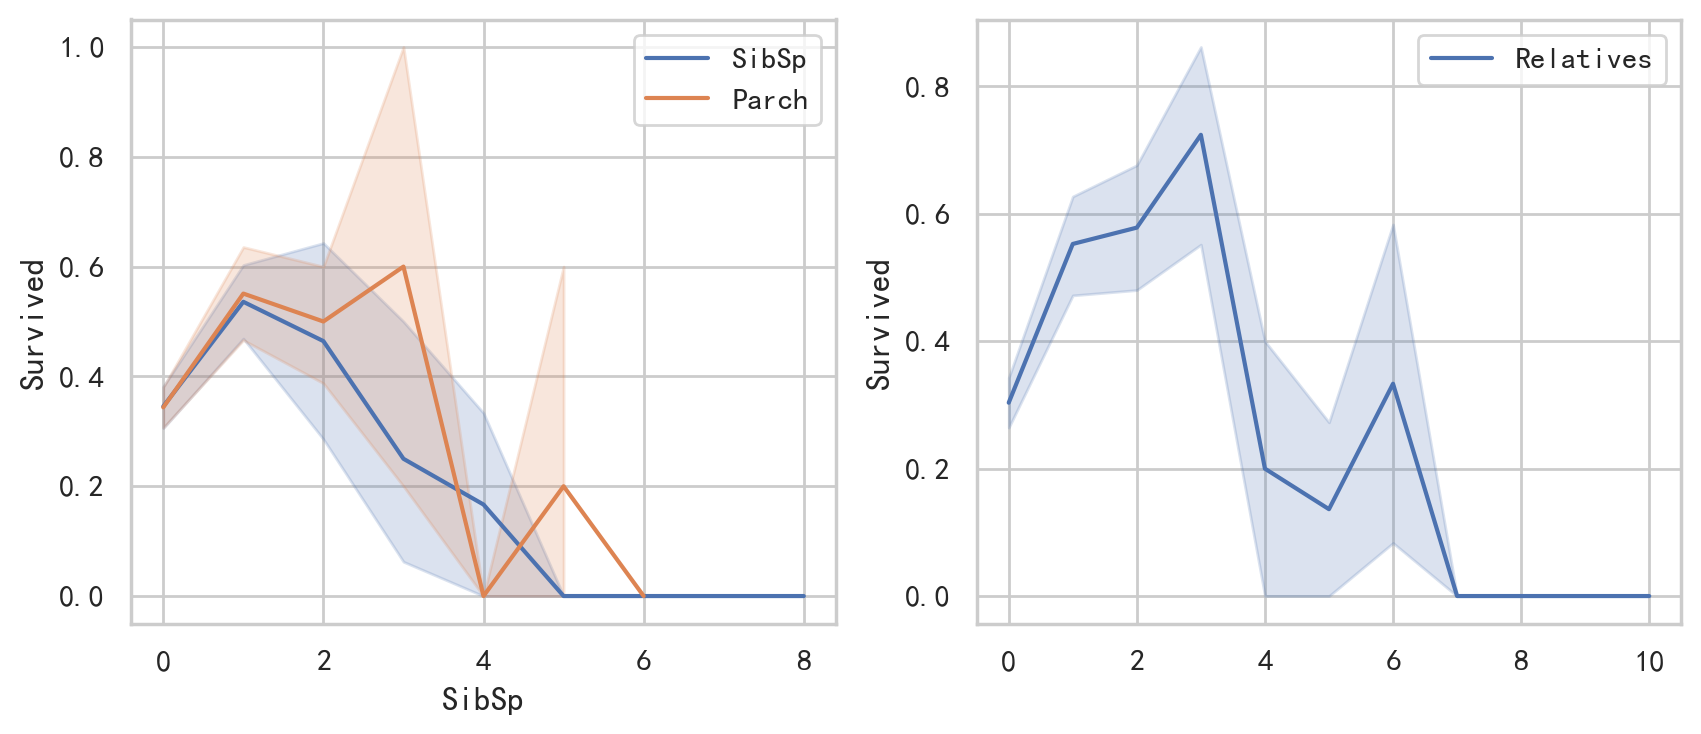

In [34]:
# 乘客在船上的兄弟姐妹和父母小孩的数量与存活率的关系

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),dpi=200)

ax = sns.lineplot(x='SibSp', y='Survived', data=train_df,
                  ax=axes[0], label='SibSp')
ax = sns.lineplot(x='Parch', y='Survived', data=train_df,
                  ax=axes[0], label='Parch')

relatives = train_df['SibSp'] + train_df['Parch']

# 乘客在船上的亲属的数量与存活率的关系
_ax = sns.lineplot(x=relatives, y=train_df['Survived'],
                   ax=axes[1], label='Relatives')
plt.show()

### 数据预处理：定义类

In [35]:
class People_on_board:
    def __init__(self,suivived,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked):
        self.survived = survived
        self.Pclass = Pclass
        self.name = name
        self.sex = sex
        self.age = age
        self.sibsp = sibsp
        self.parch = parch
        self.ticket = ticket
        self.fare = fare
        self.cabin = cabin
        self.embarked = embarked
    
    #判断该乘客是否独自登船
    def is_alone(self):
        try:
            if self.sibsp + self.sibsp == 0:
                return True
            else:
                return False
        except ArgumentNullException:
            print ("Error: 存在缺失值")

In [36]:
#年龄缺失值填充：随机森林算法
from sklearn.ensemble import RandomForestRegressor

def set_missing_age(df):
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    
    y = known_age[:,0]
    x = known_age[:,1:]
    

    # 利用随机森林进行拟合
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(x,y)

    # 利用训练的模型进行预测
    predictedAges = rfr.predict(unknown_age[:,1::])

    # 填补缺失的原始数据
    df.loc[(df.Age.isnull()),'Age'] = predictedAges

    return df

### 数据预处理：缺失值填充

In [11]:
# 填充训练集缺失值
x_train = train_df.copy()
x_train = set_missing_age(x_train)
x_train["Embarked"].fillna(x_train['Embarked'].value_counts().idxmax(), inplace=True)
x_train.drop('Cabin', axis=1, inplace=True)

In [40]:
x_train = pd.get_dummies(x_train, columns=["Pclass","Embarked","Sex"])
x_train.drop(['PassengerId','Sex_female','Name','Ticket'], axis=1, inplace=True)

x_train.head()

,Survived,Age,SibSp,Parch,Fare,Age_int,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,22,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,38,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,26,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,35,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,35,0,0,1,0,0,1,1


<AxesSubplot:xlabel='Age_int', ylabel='Survived'>

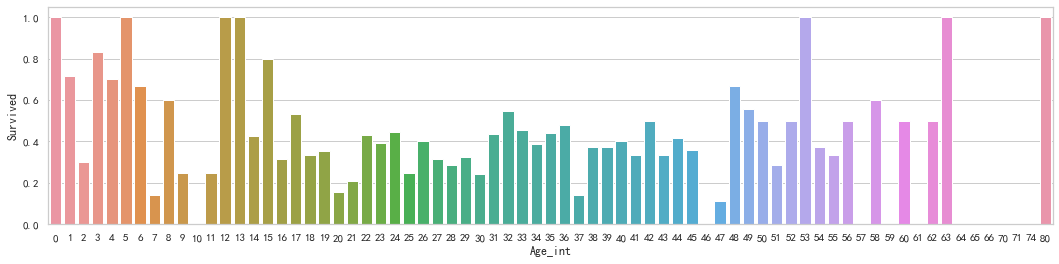

In [37]:
# 不同年龄下的平均生存率
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
x_train['Age_int'] = x_train['Age'].astype(int)
average_age = x_train[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int',y='Survived',data=average_age)

In [43]:
# 对测试集作同样的处理
x_test = test_df.copy()
x_test["Fare"].fillna(x_test["Fare"].median(skipna=True), inplace=True)
x_test = set_missing_age(x_test)
x_test.drop('Cabin', axis=1, inplace=True)

In [44]:
x_test = pd.get_dummies(x_test, columns=["Pclass","Embarked","Sex"])
x_test.drop(['PassengerId','Sex_female','Name','Ticket'], axis=1, inplace=True)

x_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,0,0,7.8292,0,0,1,0,1,0,1
1,47.0,1,0,7.0000,0,0,1,0,0,1,0
2,62.0,0,0,9.6875,0,1,0,0,1,0,1
3,27.0,0,0,8.6625,0,0,1,0,0,1,1
4,22.0,1,1,12.2875,0,0,1,0,0,1,0


### 模型拟合与训练：Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()

cols = ['Age','SibSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Sex_male']
X = x_train[cols]
y = train_df['Survived']

rfe = RFE(model,n_features_to_select=11)
rfe = rfe.fit(X, y)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male']


C:\Users\YuanYuxin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#logistic Regression
lr = LogisticRegression(solver='liblinear',C=1.0,penalty='l2',tol=1e-6)
lr.fit(X,y)

X_test = x_test[cols]

predictions = lr.predict(X_test)
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].values,'Survived':predictions.astype(np.int32)})

In [47]:
# 交叉检验
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print(score)
print(score.mean())

[0.77653631 0.80337079 0.78089888 0.76966292 0.83707865]
0.7935095097608437


In [49]:
from sklearn import preprocessing
#特征优化
# 将SibSp属性，我们划分成0,1~2，3~8三个等级
x_train['SibSp_level'] = 1
x_train.loc[x_train['SibSp'] == 0, 'SibSp_level'] = 0
x_train.loc[x_train['SibSp'] >= 3, 'SibSp_level'] = 2

# 对于Parch属性，我们划分成0,1~3，4~6三个等级
x_train['Parch_level'] = 1
x_train.loc[x_train['Parch'] == 0, 'Parch_level'] = 0
x_train.loc[x_train['Parch'] >= 4, 'Parch_level'] = 2

x_train = pd.get_dummies(x_train, columns=['SibSp_level','Parch_level'])

transfer = preprocessing.MinMaxScaler(feature_range=[0, 1])
x_train['Age_scaled'] = transfer.fit_transform(x_train['Age'].values.reshape(-1, 1))
x_train['Fare_scaled'] = transfer.fit_transform(x_train['Fare'].values.reshape(-1, 1))

cols = ['Age_scaled','Fare_scaled','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Sex_male','SibSp_level_0','SibSp_level_1','SibSp_level_2','Parch_level_0','Parch_level_1','Parch_level_2']
X = x_train[cols]
y = train_df['Survived']

In [50]:
# 再次交叉验证
score = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print(score)
print(score.mean())

[0.79329609 0.80898876 0.79775281 0.80898876 0.80898876]
0.8036030381018142


In [51]:
lr.fit(X,y)
feature_corr = pd.DataFrame({'columns':list(X.columns),'coef':list(lr.coef_.T)})
feature_corr

,columns,coef
0,Age_scaled,[-2.049273480305023]
1,Fare_scaled,[0.446507964219773]
2,Pclass_1,[1.1140141609135077]
3,Pclass_2,[0.15114697406358174]
4,Pclass_3,[-0.883487962141976]
5,Embarked_C,[0.21143492302701677]
6,Embarked_Q,[0.2953818232967958]
7,Embarked_S,[-0.12514357348869223]
8,Sex_male,[-2.513878434836717]
9,SibSp_level_0,[0.4555846585457383]
